## 41_eda_volcanic_eruption.ipynb
<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>This script provides an EDA and some visualisation for the selected and enriched volcano and eruption datasets.</b> The main parts of the routines were developed in previous courses at the University of London by the same author (Mohr, 2021, 2023, 2024a) and have been further refined to meet the needs of this MSc thesis project/research. However, the code has been updated to comply with the latest requirements and package interdependencies. Some comments will be included in this Jupyter Notebook, and the code contains several inline comments. For details on the project/research itself, refer to the appropriate document.

#### References (for this script)
*Mohr, S. (2021) Regional Spatial Clusters of Earthquakes at the Pacific Ring of Fire: Analysing Data from the USGS ANSS ComCat and Building Regional Spatial Clusters. DSM020, Python, examined coursework cw1. University of London.*

*Mohr, S. (2023) Clustering of Earthquakes on a Worldwide Scale with the Help of Big Data Machine Learning Methods. DSM010, Big Data, examined coursework cw2. University of London.*

*Mohr, S. (2024a) Comparing Different Tectonic Setups Considering Publicly Available Basic Earthquake’s Data. DSM050, Data Visualisation, examined coursework cw1. University of London.*

#### History
<pre>
250105 Generation from previous courseworks at the UoL, setup basic logging, add histogram of VEI,
       add map of earthquakes, add a correlation heatmap, correct datatype handling, 
       move shared procedures to shared_procedures.py, figure for VEI per year
250110 improve column listings
250120 Switching to parameters.py, adding selectable cluster directory, changing all directories, saving all
       relevant figures to data_dir_cluster
</pre>

#### Todo
<pre>./.</pre>

## Preparing the environment
### System information

In [1]:
# which python installation and version are we using here?
print('\n******* Python Info ***********')
!which python
!python --version

# show some CPU and RAM info
print('\n******* CPU Info ***********')
!lscpu
print('\n******* RAM Info (in GB) ***********')
!free -g


******* Python Info ***********
/bin/python
Python 3.8.10

******* CPU Info ***********
Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      46 bits physical, 48 bits virtual
CPU(s):                             64
On-line CPU(s) list:                0-63
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          4
NUMA node(s):                       4
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              85
Model name:                         Intel(R) Xeon(R) Gold 6234 CPU @ 3.30GHz
Stepping:                           7
CPU MHz:                            1200.237
CPU max MHz:                        4000.0000
CPU min MHz:                        1200.0000
BogoMIPS:                           6600.00
Virtualization:                     VT-x
L1

In [2]:
# show installed packages and versions
!pip freeze

absl-py==2.1.0
affine==2.4.0
aggdraw==1.3.16
arch==5.6.0
array-record==0.4.0
astropy==5.2.2
asttokens==2.4.1
astunparse==1.6.3
atomicwrites==1.1.5
attrs==19.3.0
Automat==0.8.0
backcall==0.2.0
beautifulsoup4==4.12.3
blinker==1.4
branca==0.8.1
cachetools==5.5.0
certifi==2019.11.28
cftime==1.6.4.post1
chardet==3.0.4
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloud-init==24.3.1
clustpy==0.0.1
colorama==0.4.3
comm==0.2.2
command-not-found==0.3
configobj==5.0.6
confluent-kafka==2.5.3
constantly==15.1.0
contextily==1.5.2
contourpy==1.1.1
cryptography==2.8
cupshelpers==1.0
cycler==0.10.0
dbus-python==1.2.16
debugpy==1.8.7
decorator==4.4.2
defer==1.0.6
distro==1.4.0
distro-info==0.23+ubuntu1.1
dm-tree==0.1.8
dtw==1.4.0
entrypoints==0.3
et-xmlfile==1.0.1
etils==1.3.0
executing==2.0.1
fail2ban==0.11.1
fastjsonschema==2.20.0
filelock==3.13.1
fiona==1.9.6
flatbuffers==24.3.25
folium==0.18.0
fonttools==4.53.1
frites==0.4.4
fsspec==2023.12.2
ftfy==6.2.0
gast==0.4.0
geodatasets==2024.8.0
geographi

### Setting PATH correctly

In [3]:
# there is somewhere a PATH-error on LENA for a while
# adding my packages path to the PATH environment

import sys
sys.path.append("/home/smohr001/.local/lib/python3.8/site-packages")
sys.path

['/home/smohr001/thesis',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/opt/jupyterhub/lib/python3.8/site-packages',
 '/opt/jupyterhub/lib/python3.8/site-packages/IPython/extensions',
 '/home/smohr001/.ipython',
 '/home/smohr001/.local/lib/python3.8/site-packages']

### Loading libraries

In [4]:
# importing standard libraries
import sys
import os
import warnings
import datetime
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import logging
from IPython.display import display, Javascript

# importing shared procedures for this procect (needs to be a simple .py file)
%run shared_procedures.py

# importing additional libraries
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from tabulate import tabulate
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LogLocator

# get info about installed and used versions of some important (deep learning) libraries
print("Some important installed libraries:\n")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Some important installed libraries:

Pandas version: 1.4.1
Numpy version: 1.22.2
Seaborn version: 0.13.2


### Setting the script environment

In [5]:
# import the parameters (foreced to reload)
import parameters
import importlib
importlib.reload(parameters)

# print all loaded parameters from the Python file
print("Loaded Parameters:\n")
for key in dir(parameters):
    if not key.startswith("__"):
        value = getattr(parameters, key)
        print(f"parameters.{key} = {value}")

Loaded Parameters:

parameters.buffer_size_km = 1000
parameters.data_dir = data/scope/studyarea_1000
parameters.data_dir_raw = data
parameters.data_ts_dir = data/scope/studyarea_1000
parameters.scope_id = studyarea_1000


In [6]:
# show all matplotlib graphs inline
%matplotlib inline

# setting format to JPG for easy copy & paste for figures
# for high quality outputs choose 'svg'
%config InlineBackend.figure_format = 'jpg'

# adjust display settings to show 20 rows as a standard
pd.set_option('display.max_rows', 20)

# disable warnings (activate after developing the complete code)
warnings.filterwarnings('ignore')

# set script (ipynb notebook) name (e.g. for logging)
script_name = "41_eda_volcanic_eruptions.ipynb"

# start parameterized logging
setup_logging(logfile_dir = "log", 
              logfile_name = "40_eda.log", 
              log_level = logging.INFO, 
              script_name = script_name
             )

# set data directory
if(parameters.data_dir_raw):
    data_dir_raw = parameters.data_dir_raw
else:
    data_dir_raw = "data"
logging.info(f"{script_name}: Set raw data directory to './{data_dir_raw}'.")

if(parameters.data_dir):
    data_dir = parameters.data_dir
else:
    data_dir = "data"
logging.info(f"{script_name}: Set scope data directory to './{data_dir}'.")

if(parameters.data_ts_dir):
    data_ts_dir = parameters.data_ts_dir
else:
    data_ts_dir = "data/timeseries"
logging.info(f"{script_name}: Set scope timeseries data directory to './{data_ts_dir}'.")

2025-01-30 18:09:38,932 - INFO - Starting script '41_eda_volcanic_eruptions.ipynb'.
2025-01-30 18:09:38,933 - INFO - Set loglevel to INFO.
2025-01-30 18:09:38,934 - INFO - 41_eda_volcanic_eruptions.ipynb: Set raw data directory to './data'.
2025-01-30 18:09:38,935 - INFO - 41_eda_volcanic_eruptions.ipynb: Set scope data directory to './data/scope/studyarea_1000'.
2025-01-30 18:09:38,935 - INFO - 41_eda_volcanic_eruptions.ipynb: Set scope timeseries data directory to './data/scope/studyarea_1000'.


In [7]:
# set fixed seed for reproducibility
reset_random_seeds(script_name=script_name)

2025-01-30 18:09:38,940 - INFO - 41_eda_volcanic_eruptions.ipynb: Seeding random generators with seed=654321.


## Loading data

In [8]:
def list_subdirectories(directory, prefix="cluster_"):
    # Filter subdirectories with the given prefix
    return [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name)) and name.startswith(prefix)]

def choose_subdirectory(directory):
    subdirs = list_subdirectories(directory)
    
    if not subdirs:
        print(f"No subdirectories starting with 'cluster_' were found in {directory}.")
        return None

    # Print the list of subdirectories with indices
    print("Available subdirectories:")
    for i, subdir in enumerate(subdirs):
        print(f"{i + 1}: {subdir}")
    
    # Prompt the user to select a subdirectory
    while True:
        try:
            choice = int(input("Enter the number of the subdirectory you want to choose: "))
            if 1 <= choice <= len(subdirs):
                return subdirs[choice - 1]
            else:
                print("Invalid choice. Please enter a number from the list.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# set individual clusterdir for saving
selected_subdir = choose_subdirectory(data_dir)
data_dir_cluster = os.path.join(data_dir, selected_subdir)
data_ts_dir_cluster = os.path.join(data_ts_dir, selected_subdir)
logging.info(f"{script_name}: Set cluster data directory to './{data_dir_cluster}'.")
logging.info(f"{script_name}: Set cluster timeseries data directory to './{data_ts_dir_cluster}'.")

# load dataset
volcanoes_enriched = load_dataset(data_file="volcanoes_enriched.csv", data_dir=data_dir_cluster)
eruptions_enriched = load_dataset(data_file="eruptions_enriched.csv", data_dir=data_dir_cluster)

Available subdirectories:
1: cluster_all
Enter the number of the subdirectory you want to choose: 1


2025-01-30 18:09:40,696 - INFO - 41_eda_volcanic_eruptions.ipynb: Set cluster data directory to './data/scope/studyarea_1000/cluster_all'.
2025-01-30 18:09:40,697 - INFO - 41_eda_volcanic_eruptions.ipynb: Set cluster timeseries data directory to './data/scope/studyarea_1000/cluster_all'.
2025-01-30 18:09:40,707 - INFO - load_dataset: Data loaded successfully from 'data/scope/studyarea_1000/cluster_all/volcanoes_enriched.csv'.
2025-01-30 18:09:40,718 - INFO - load_dataset: Data loaded successfully from 'data/scope/studyarea_1000/cluster_all/eruptions_enriched.csv'.


## Statistics and information

In [9]:
# infos of the datasets
print("Volcanoes")
pd.set_option('display.max_rows', None)
print("\nShape:\n" + str(volcanoes_enriched.shape))
print("\nColumns and DataTypes:\n" + str(volcanoes_enriched.dtypes))
pd.set_option('display.max_rows', 20)
display(volcanoes_enriched)
logging.info(f"{script_name}: Used dataset is 'earthquakes_scraped' with {volcanoes_enriched.shape}.")

print("Eruptions")
pd.set_option('display.max_rows', None)
print("\nShape:\n" + str(eruptions_enriched.shape))
print("\nColumns and DataTypes:\n" + str(eruptions_enriched.dtypes))
pd.set_option('display.max_rows', 20)
display(eruptions_enriched)
logging.info(f"{script_name}: Used dataset is 'earthquakes_scraped' with {volcanoes_enriched.shape}.")

Volcanoes

Shape:
(201, 18)

Columns and DataTypes:
Unnamed: 0.1              int64
Unnamed: 0                int64
Volcano_Number            int64
geo_x                   float64
geo_y                   float64
Volcano_Name             object
Primary_Volcano_Type     object
Country                  object
Region                   object
Latitude                float64
Longitude               float64
Elevation                 int64
Tectonic_Setting         object
Evidence_Category        object
Major_Rock_Type          object
Erupting                   bool
Last_Activity_Year        int64
geometry                 object
dtype: object


,Unnamed: 0.1,Unnamed: 0,Volcano_Number,geo_x,geo_y,Volcano_Name,Primary_Volcano_Type,Country,Region,Latitude,Longitude,Elevation,Tectonic_Setting,Evidence_Category,Major_Rock_Type,Erupting,Last_Activity_Year,geometry
0,0,0,241040,177.1800,-37.5200,Whakaari/White Island,Stratovolcano(es),New Zealand,Tonga-Kermadec Volcanic Regions,-37.5200,177.1800,294,Subduction zone / Continental crust (> 25 km),Eruption Observed,Andesite / Basaltic Andesite,True,2019,POINT (177.18 -37.52)
1,1,1,241050,176.5069,-38.1569,Okataina,Lava dome(s),New Zealand,Tonga-Kermadec Volcanic Regions,-38.1569,176.5069,1111,Subduction zone / Continental crust (> 25 km),Eruption Observed,Rhyolite,True,1981,POINT (176.5069 -38.1569)
2,2,2,241080,175.6320,-39.1570,Tongariro,Stratovolcano(es),New Zealand,Tonga-Kermadec Volcanic Regions,-39.1570,175.6320,1978,Subduction zone / Continental crust (> 25 km),Eruption Observed,Andesite / Basaltic Andesite,True,2012,POINT (175.632 -39.157)
3,3,3,241100,175.5700,-39.2800,Ruapehu,Stratovolcano(es),New Zealand,Tonga-Kermadec Volcanic Regions,-39.2800,175.5700,2797,Subduction zone / Continental crust (> 25 km),Eruption Observed,Andesite / Basaltic Andesite,True,2007,POINT (175.57 -39.28)
4,4,4,242030,182.0800,-29.2700,Raoul Island,Stratovolcano(es),New Zealand,Tonga-Kermadec Volcanic Regions,-29.2700,-177.9200,516,Subduction zone / Oceanic crust (< 15 km),Eruption Observed,Andesite / Basaltic Andesite,True,2006,POINT (-177.92 -29.27)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,358041,287.3486,-42.8349,Chaiten,Caldera,Chile,South America Volcanic Regions,-42.8349,-72.6514,1122,Subduction zone / Continental crust (> 25 km),Eruption Observed,Rhyolite,True,2011,POINT (-72.6514 -42.8349)
197,197,197,358057,287.0300,-45.9000,"Hudson, Cerro",Stratovolcano(es),Chile,South America Volcanic Regions,-45.9000,-72.9700,1905,Subduction zone / Continental crust (> 25 km),Eruption Observed,Basalt / Picro-Basalt,True,2011,POINT (-72.97 -45.9)
198,198,198,358060,286.4960,-49.0190,Lautaro,Stratovolcano(es),Chile,South America Volcanic Regions,-49.0190,-73.5040,3542,Subduction zone / Continental crust (> 25 km),Eruption Observed,Dacite,True,1979,POINT (-73.504 -49.019)
199,199,199,284193,145.7800,16.5800,South Sarigan Seamount,Stratovolcano(es),United States,Northwest Pacific Volcanic Regions,16.5800,145.7800,-184,Subduction zone / Crustal thickness unknown,Eruption Observed,unknown,True,2010,POINT (145.78 16.58)


2025-01-30 18:09:40,747 - INFO - 41_eda_volcanic_eruptions.ipynb: Used dataset is 'earthquakes_scraped' with (201, 18).


Eruptions

Shape:
(1252, 19)

Columns and DataTypes:
datetime                 int64
Unnamed: 0               int64
Volcano_Number           int64
Eruption_Number          int64
Activity_Type           object
ExplosivityIndexMax      int64
StartEvidenceMethod     object
StartDateYear            int64
StartDateMonth           int64
StartDateDay             int64
EndDateYear              int64
EndDateMonth             int64
EndDateDay               int64
StartDate               object
EndDate                 object
EruptedVolume            int64
DurationDays             int64
DailyEruptedVolume     float64
timeymd                  int64
dtype: object


,datetime,Unnamed: 0,Volcano_Number,Eruption_Number,Activity_Type,ExplosivityIndexMax,StartEvidenceMethod,StartDateYear,StartDateMonth,StartDateDay,EndDateYear,EndDateMonth,EndDateDay,StartDate,EndDate,EruptedVolume,DurationDays,DailyEruptedVolume,timeymd
0,19340808,444,352090,11648,Confirmed Eruption,3,Observations: Reported,1934,8,8,2011,3,2,1934-08-08,2011-03-02,50000000,27966,1.787885e+03,19340808
1,19551013,348,282080,17088,Confirmed Eruption,3,Observations: Reported,1955,10,13,2016,8,22,1955-10-13,2016-08-22,50000000,22230,2.249213e+03,19551013
2,19561116,149,282030,16936,Confirmed Eruption,2,Observations: Reported,1956,11,16,1984,5,16,1956-11-16,1984-05-16,5000000,10044,4.978096e+02,19561116
3,19630702,1243,341040,10467,Confirmed Eruption,1,Observations: Reported,1963,7,2,1970,7,2,1963-07-02,1970-07-02,100000,2558,3.909304e+01,19630702
4,19650309,411,300250,19348,Confirmed Eruption,3,Observations: Reported,1965,3,9,1970,3,16,1965-03-09,1970-03-16,50000000,1834,2.726281e+04,19650309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,20191013,189,243070,22334,Confirmed Eruption,1,Observations: Reported,2019,10,13,2019,10,22,2019-10-13,2019-10-22,100000,10,1.000000e+04,20191013
1248,20191102,337,282060,22339,Confirmed Eruption,2,Observations: Reported,2019,11,2,2019,11,2,2019-11-02,2019-11-02,5000000,1,5.000000e+06,20191102
1249,20191205,233,284096,22340,Confirmed Eruption,1,Observations: Reported,2019,12,5,2020,8,27,2019-12-05,2020-08-27,100000,267,3.745318e+02,20191205
1250,20191207,643,311060,22341,Confirmed Eruption,1,Observations: Reported,2019,12,7,2020,6,19,2019-12-07,2020-06-19,100000,196,5.102041e+02,20191207


2025-01-30 18:09:40,760 - INFO - 41_eda_volcanic_eruptions.ipynb: Used dataset is 'earthquakes_scraped' with (201, 18).


## Setting correct datatypes

In [10]:
# show all column names
print("Volcanoes column names")
print(volcanoes_enriched.columns.tolist())

print("\nEruptions column names")
print(eruptions_enriched.columns.tolist())

Volcanoes column names
['Unnamed: 0.1', 'Unnamed: 0', 'Volcano_Number', 'geo_x', 'geo_y', 'Volcano_Name', 'Primary_Volcano_Type', 'Country', 'Region', 'Latitude', 'Longitude', 'Elevation', 'Tectonic_Setting', 'Evidence_Category', 'Major_Rock_Type', 'Erupting', 'Last_Activity_Year', 'geometry']

Eruptions column names
['datetime', 'Unnamed: 0', 'Volcano_Number', 'Eruption_Number', 'Activity_Type', 'ExplosivityIndexMax', 'StartEvidenceMethod', 'StartDateYear', 'StartDateMonth', 'StartDateDay', 'EndDateYear', 'EndDateMonth', 'EndDateDay', 'StartDate', 'EndDate', 'EruptedVolume', 'DurationDays', 'DailyEruptedVolume', 'timeymd']


In [11]:
# define (target) data types for volcanoes
set_types_volcanoes = {'Volcano_Number': 'int64',
                       'Volcano_Name': 'object',
                       'Primary_Volcano_Type': 'object',
                       'Last_Activity_Year': 'int64',
                       'Country': 'object',
                       'Region': 'object',
                       'Latitude': 'float64',
                       'Longitude': 'float64',
                       'Elevation': 'int64',
                       'Tectonic_Setting': 'object',
                       'Evidence_Category': 'object',
                       'Major_Rock_Type': 'object'
                      }

# check data types for volcanoes
check_data_types_of_dataframe(volcanoes_enriched, set_types_volcanoes)

Checking datatypes (no output means nothing to correct):



In [12]:
# define (target) data types for eruptions
set_types_eruptions = {'Volcano_Number': 'int64',
                       'Eruption_Number': 'int64',
                       'Activity_Type': 'object',
                       'ExplosivityIndexMax': 'int64',
                       'EruptedVolume': 'int64',
                       'StartEvidenceMethod': 'object',
                       'StartDateYear': 'int64',
                       'StartDateMonth': 'int64',
                       'StartDateDay': 'int64',
                       'EndDateYear': 'int64',
                       'EndDateMonth': 'int64',
                       'EndDateDay': 'int64',
                       'StartDate': 'datetime64[ns]',
                       'EndDate': 'datetime64[ns]'
                      }

## check data types
check_data_types_of_dataframe(eruptions_enriched, set_types_eruptions)

Checking datatypes (no output means nothing to correct):

StartDate: object --> datetime64[ns]
EndDate: object --> datetime64[ns]


In [13]:
# convert datatypes
print("Volcanoes")
volcanoes_enriched = convert_data_types_of_dataframe(volcanoes_enriched, set_types_volcanoes)

# handling of spatial geometry point information (pre-applying the right format)
print("Column 'geometry' pre-converted with WKT information (prepared for POINT conversion).")
volcanoes_enriched['geometry'] = volcanoes_enriched['geometry'].apply(wkt.loads)

print("\nEruptions")
eruptions_enriched = convert_data_types_of_dataframe(eruptions_enriched, set_types_eruptions)

Volcanoes
Column 'Volcano_Number' converted to int64.
Column 'Volcano_Name' converted to object.
Column 'Primary_Volcano_Type' converted to object.
Column 'Last_Activity_Year' converted to int64.
Column 'Country' converted to object.
Column 'Region' converted to object.
Column 'Latitude' converted to float64.
Column 'Longitude' converted to float64.
Column 'Elevation' converted to int64.
Column 'Tectonic_Setting' converted to object.
Column 'Evidence_Category' converted to object.
Column 'Major_Rock_Type' converted to object.
Column 'geometry' pre-converted with WKT information (prepared for POINT conversion).

Eruptions
Column 'Volcano_Number' converted to int64.
Column 'Eruption_Number' converted to int64.
Column 'Activity_Type' converted to object.
Column 'ExplosivityIndexMax' converted to int64.
Column 'EruptedVolume' converted to int64.
Column 'StartEvidenceMethod' converted to object.
Column 'StartDateYear' converted to int64.
Column 'StartDateMonth' converted to int64.
Column 'S

## EDA
### Columns

In [14]:
# Columns for Volcanoes
print("Columns for Volcanoes")
print("=====================")
cat_col_volcanoes = get_categorical_columns(volcanoes_enriched)
num_col_volcanoes = get_numerical_columns(volcanoes_enriched)
bool_col_volcanoes = get_boolean_columns(volcanoes_enriched)
temporal_col_volcanoes = get_temporal_columns(volcanoes_enriched)
print("Categorical:\n", cat_col_volcanoes)
print("Numerical:\n", num_col_volcanoes)
print("Boolean:\n", bool_col_volcanoes)
print("Temporal:\n", temporal_col_volcanoes)

# Columns for Eruptions
print("\nColumns for Eruptions")
print("=====================")
cat_col_eruptions = get_categorical_columns(eruptions_enriched)
num_col_eruptions = get_numerical_columns(eruptions_enriched)
bool_col_eruptions = get_boolean_columns(eruptions_enriched)
temporal_col_eruptions = get_temporal_columns(eruptions_enriched)
print("Categorical:\n", cat_col_eruptions)
print("Numerical:\n", num_col_eruptions)
print("Boolean:\n", bool_col_eruptions)
print("Temporal:\n", temporal_col_eruptions)

Columns for Volcanoes
Categorical:
 ['Volcano_Name', 'Primary_Volcano_Type', 'Country', 'Region', 'Tectonic_Setting', 'Evidence_Category', 'Major_Rock_Type', 'geometry']
Numerical:
 ['Unnamed: 0.1', 'Unnamed: 0', 'Volcano_Number', 'geo_x', 'geo_y', 'Latitude', 'Longitude', 'Elevation', 'Last_Activity_Year']
Boolean:
 ['Erupting']
Temporal:
 []

Columns for Eruptions
Categorical:
 ['Activity_Type', 'StartEvidenceMethod']
Numerical:
 ['datetime', 'Unnamed: 0', 'Volcano_Number', 'Eruption_Number', 'ExplosivityIndexMax', 'StartDateYear', 'StartDateMonth', 'StartDateDay', 'EndDateYear', 'EndDateMonth', 'EndDateDay', 'EruptedVolume', 'DurationDays', 'DailyEruptedVolume', 'timeymd']
Boolean:
 []
Temporal:
 ['StartDate', 'EndDate']


### VEI histogram

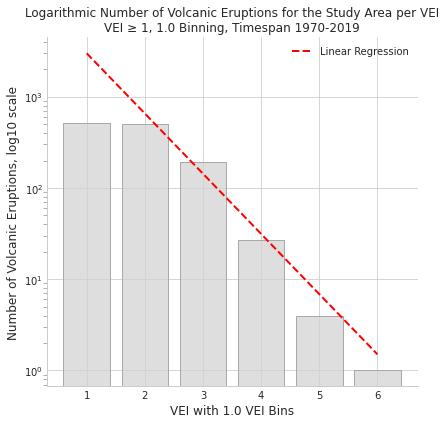

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator

# Set the style to a more scientific look
plt.style.use('seaborn-whitegrid')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 6))

# Logarithmic y-scale
plt.yscale('log')

# Set tick label font sizes
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='y', which='minor', labelsize=8, length=4, color='gray')

# Set x-axis ticks at every 1.0 interval
x_ticks = np.arange(1.0, 7.0, 1.0)  # Adjust the range as needed
ax.set_xticks(x_ticks)

# Enable minor ticks on the y-axis
ax.minorticks_on()

# Customize minor ticks using LogLocator
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=10))

# Create a vertical histogram with better alignment
sns.histplot(data=eruptions_enriched,
             x='ExplosivityIndexMax', 
             color='lightgray',
             edgecolor='darkgray',
             bins=4,  # Use bins or binwidth carefully
             discrete=True,  # Ensure precise bar positioning
             shrink=0.8  # Adjust bar width slightly for spacing clarity
            )

# Add an estimated linear regression line
x_values = np.array([1.0, 6.0])
y_values = np.array([3.0 * 10**3, 1.5 * 10**0])
ax.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label='Linear Regression')

# Customize the plot
ax.set_xlabel('VEI with 1.0 VEI Bins', fontsize=12)
ax.set_ylabel('Number of Volcanic Eruptions, log10 scale', fontsize=12)
ax.set_title('Logarithmic Number of Volcanic Eruptions for the Study Area per VEI\nVEI ≥ 1, 1.0 Binning, Timespan 1970-2019', fontsize=12)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend including the regression line
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


### Spatial distribution of Holocene volcanoes erupting 1970-2019

In [16]:
# convert the DataFrame to a GeoDataFrame in Mercator Projection (EPSG:3857) or WGS84 (EPSG:4326)
volcanoes_enriched_gdf = gpd.GeoDataFrame(volcanoes_enriched, geometry='geometry', crs="EPSG:4326")

# show the CRS
print("EPSG code: ", volcanoes_enriched_gdf.crs)

EPSG code:  EPSG:4326


In [17]:
# load the Tectonic Plate shapefile
plates_gdf = gpd.read_file('shapefiles/Plate_Boundaries.shp')

# show the CRS
print(plates_gdf.crs)

# get the lowres world data from geopandas
# (ATTENTION: this will be deprecated in future use. For this case, the data is available as a saved pickle)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(world.crs)

EPSG:4326
EPSG:4326


In [18]:
# # initialize plot
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot()

# # plot a basic map of the world
# world.plot(
#     ax=ax,
#     color="#dddddd",
#     edgecolor=None,
#     alpha=0.5
# )

# # plot volcanoes
# volcanoes_enriched_gdf.plot(ax=ax, 
#                             markersize=80,
#                             alpha=1.0,
#                             color='red',
#                             label='Volcanoes', 
#                             legend=True,
#                             marker='^'
#                            )

# # plot the plates
# plates_gdf.plot(ax=ax, 
#                 color='brown', 
#                 edgecolor='None',
#                 linewidth=2,
#                 alpha=0.3
#                )

# # add axis labels
# ax.set_xlabel('Longitude', fontsize=16)
# ax.set_ylabel('Latitude', fontsize=16)

# # set the x-axis limits to clip the figure
# ax.set_xlim(-180, 180)
# ax.set_ylim(-90, 90)

# # adjust ticks for major an minor grid
# ax.tick_params(axis='both', which='major', labelsize=14)

# # add major and minor grid
# ax.minorticks_on()
# ax.grid(which="major", visible=True, alpha=0.50, color="#999999")
# ax.grid(which="minor", visible=True, alpha=0.25, color="#cccccc")

# # add the legend
# ax.legend()

# # adding a title and legend
# plt.title('Holocene Volcanoes of the Study Area, Eruption Timespan 1970-2019\nHighligthing Tectonic Plate Boundaries', fontsize=20)

# # Add a rectangle (bounding box) to the plot
# box_lat_min, box_lat_max = -60, 65
# box_lon_min, box_lon_max = -180, -60
# rectangle = Rectangle(
#     (box_lon_min, box_lat_min),
#     box_lon_max - box_lon_min,
#     box_lat_max - box_lat_min,
#     linewidth=2,
#     edgecolor='blue',
#     facecolor='none',
#     linestyle='--',
#     label='Region of Interest'
# )
# ax.add_patch(rectangle)

# # Add a rectangle (bounding box) to the plot
# box_lat_min, box_lat_max = -70, 70
# box_lon_min, box_lon_max = 100, 180
# rectangle = Rectangle(
#     (box_lon_min, box_lat_min),
#     box_lon_max - box_lon_min,
#     box_lat_max - box_lat_min,
#     linewidth=2,
#     edgecolor='blue',
#     facecolor='none',
#     linestyle='--',
#     label='Region of Interest'
# )
# ax.add_patch(rectangle)

# # Create custom legend handles
# volcano_handle = Line2D([], [], color='red', marker='^', markersize=10, linestyle='None', alpha=1.0, label='Volcanoes')
# rectangle_handle = Rectangle((0, 0), 1, 1, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2, label='Region of Interest')
# plates_handle = Line2D([0], [0], color='brown', lw=2, label='Tectonic Plates')

# # add the legend items
# ax.legend(handles=[volcano_handle, rectangle_handle, plates_handle],
#           loc='lower center', 
#           title=None, 
#           fontsize=12,                            
#           bbox_to_anchor=(1.10, 0.88),
#           borderaxespad=0,
#           prop={'size': 14},
#           frameon=False
# )

# # add a north arrow
# x, y, arrow_length = 0.98, 0.10, 0.08
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='black', width=5, headwidth=15),
#             ha='center', va='center', fontsize=20,
#             xycoords=ax.transAxes)

# # projection info
# ax.annotate('Projection:\nEPSG 4326 (WGS_1984)',
#            xy=(190, -88),
#             xycoords='data',
#             annotation_clip=False,
#             fontsize=14
#            )

# # draw the plot
# plt.show()

### Distribution and spatial grouping of active volcanoes 1970-2019 in the study area

In [19]:
# pivot by Region and create a pivot table
volcanoes_enriched_region_pivot = pd.pivot_table(volcanoes_enriched, index='Region', aggfunc='size')

# convert to dataframe
volcanoes_enriched_region_pivot = pd.DataFrame(volcanoes_enriched_region_pivot) 

# update the index names to display titles
volcanoes_enriched_region_pivot.index.name = 'Region'

# rename the column
volcanoes_enriched_region_pivot = volcanoes_enriched_region_pivot.rename(columns={0: 'Count'})

# calculate the percentage of the total for each region
total_sum = volcanoes_enriched_region_pivot['Count'].sum()
volcanoes_enriched_region_pivot['Percentage'] = (volcanoes_enriched_region_pivot['Count'] / total_sum) * 100

# sorting by counts
volcanoes_enriched_region_pivot = volcanoes_enriched_region_pivot.sort_values(by='Count', ascending=False)

# add sums for rows (Total)
volcanoes_enriched_region_pivot.loc['Total'] = volcanoes_enriched_region_pivot.sum()

# format rows
volcanoes_enriched_region_pivot['Count'] = volcanoes_enriched_region_pivot['Count'].apply(lambda x: int(x))
volcanoes_enriched_region_pivot['Percentage'] = volcanoes_enriched_region_pivot['Percentage'].apply(lambda x: f"{x:.2f} %")

# display results
display(volcanoes_enriched_region_pivot)

,Count,Percentage
Region,,
Northwest Pacific Volcanic Regions,58,28.86 %
South America Volcanic Regions,32,15.92 %
North America Volcanic Regions,27,13.43 %
Western Pacific Volcanic Regions,27,13.43 %
Southwest Pacific Volcanic Regions,21,10.45 %
Middle America-Caribbean Volcanic Regions,20,9.95 %
Tonga-Kermadec Volcanic Regions,15,7.46 %
Sunda-Banda Volcanic Regions,1,0.50 %
Total,201,100.00 %


2025-01-30 18:09:42,319 - INFO - 41_eda_volcanic_eruptions.ipynb: Saving 41_Holocene_Volcanoes_of_the_Study_Area.png to './data/scope/studyarea_1000/cluster_all'.


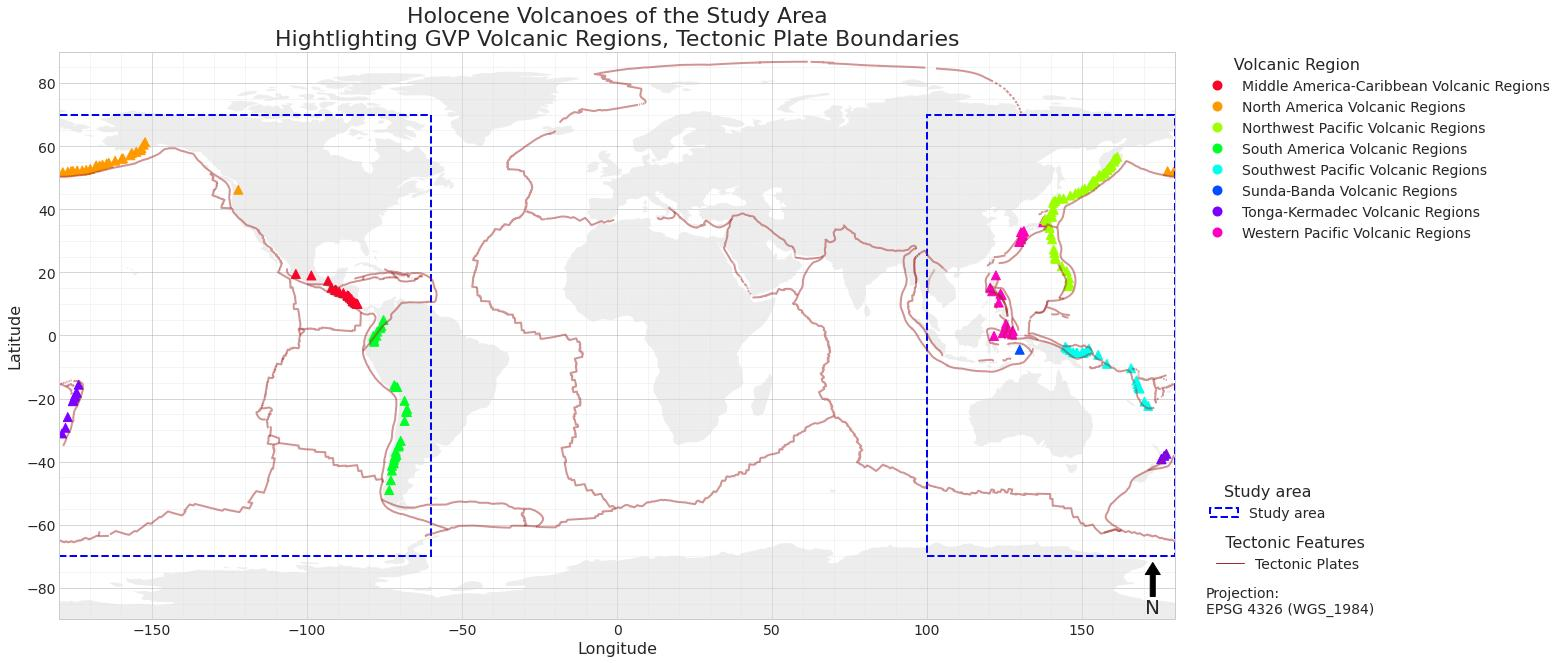

In [20]:
# set the style to a more scientific look
plt.style.use('seaborn-whitegrid')

# initialize plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()

# plot a basic map of the world
world.plot(
    ax=ax,
    color="#dddddd",
    edgecolor=None,
    alpha=0.5
)

# plot the volcanoes
volcanoes_enriched_gdf.plot(ax=ax, 
                            column='Region', 
                            markersize=80,
                            alpha=1.0,
                            label='Volcanoes', 
                            legend=True,
                            cmap='gist_rainbow',
                            categorical=True,
                            marker='^'
                           )

# plot the plates
plates_gdf.plot(ax=ax, 
                color='brown', 
                edgecolor='None',
                linewidth=2,
                alpha=0.5
               )

# add axis labels
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

# set x-axis limits to clip the figure
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# adjust ticks for major an minor grid
ax.tick_params(axis='both', which='major', labelsize=14)

# add major and minor grid
ax.minorticks_on()
ax.grid(which="major", visible=True, alpha=0.50, color="#999999")
ax.grid(which="minor", visible=True, alpha=0.25, color="#cccccc")

# add a north arrow
x, y, arrow_length = 0.98, 0.10, 0.08
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# title and legend
plt.title('Holocene Volcanoes of the Study Area\nHightlighting GVP Volcanic Regions, Tectonic Plate Boundaries', fontsize=22)

# projection info
ax.annotate('Projection:\nEPSG 4326 (WGS_1984)',
           xy=(190, -88),
            xycoords='data',
            annotation_clip=False,
            fontsize=14
           )

# add a rectangle (bounding box) to the plot
box_lat_min, box_lat_max = -70, 70
box_lon_min, box_lon_max = -180, -60
rectangle = Rectangle(
    (box_lon_min, box_lat_min),
    box_lon_max - box_lon_min,
    box_lat_max - box_lat_min,
    linewidth=2,
    edgecolor='blue',
    facecolor='none',
    linestyle='--',
    label='Region of Interest'
)
ax.add_patch(rectangle)

# add a rectangle (bounding box) to the plot
box_lat_min, box_lat_max = -70, 70
box_lon_min, box_lon_max = 100, 180
rectangle = Rectangle(
    (box_lon_min, box_lat_min),
    box_lon_max - box_lon_min,
    box_lat_max - box_lat_min,
    linewidth=2,
    edgecolor='blue',
    facecolor='none',
    linestyle='--',
    label='Region of Interest'
)
ax.add_patch(rectangle)

# move legend outside the plot with a title
leg = ax.get_legend()
handles = leg.legendHandles
labels = [text.get_text() for text in leg.get_texts()]
volcano_legend = ax.legend(handles=handles,
                           labels=labels, 
                           title='      Volcanic Region',
                           title_fontsize='16', 
                           bbox_to_anchor=(1.02, 1),
                           borderaxespad=0,
                           loc='upper left',
                           prop={'size': 14},
                           frameon=False
         )
volcano_legend._legend_box.align = "left"

# add legend for Tectonic Plates
plate_line = Line2D([0], [0], color='brown', lw=1, label='Tectonic Plates')
ax.add_artist(volcano_legend)
plate_legend = ax.legend(handles=[plate_line], 
                         title='   Tectonic Features',
                         title_fontsize='16',
                         bbox_to_anchor=(1.02, 0.17), 
                         loc='upper left',
                         prop={'size': 14},
                         frameon=False
                        )

# add rectangle to the legend
rectangle_handle = Rectangle((0, 0), 1, 1, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2, label='Study area')
ax.add_artist(plate_legend)
studyarea_legend = ax.legend(handles=[rectangle_handle], 
                         title='Study area',
                         title_fontsize='16',
                         bbox_to_anchor=(1.02, 0.26), 
                         loc='upper left',
                         prop={'size': 14},
                         frameon=False
                        )

# fake annotation to make some room for the legend (workaround)
ax.annotate(' ', xy=(275,0), xycoords='data', annotation_clip=False, fontsize=12)

# save diagram to disk
plt.savefig(os.path.join(data_dir_cluster, "41_Holocene_Volcanoes_of_the_Study_Area.png"), format='png', dpi=150, bbox_inches='tight')
logging.info(f"{script_name}: Saving 41_Holocene_Volcanoes_of_the_Study_Area.png to './{data_dir_cluster}'.")

# draw the plot
plt.show()

### The VEI temporal distribution, Time frame 1970 – 2019

In [21]:
# select only eruptions starting inside set timeframe
filtered_eruptions = eruptions_enriched[
    ((eruptions_enriched['StartDateYear'] >= 1970) & (eruptions_enriched['StartDateYear'] <= 2019))
]

# drop all rows with VEI = 0
filtered_eruptions = filtered_eruptions[filtered_eruptions['ExplosivityIndexMax'] > 0]

# group and count occurrences of ExplosivityIndexMax for each StartDateYear
grouped_data = filtered_eruptions.groupby(['StartDateYear', 'ExplosivityIndexMax']).size().reset_index(name='Count')

2025-01-30 18:09:43,109 - INFO - 41_eda_volcanic_eruptions.ipynb: Saving 41_Grouped_Count_of_Eruptions_by_VEI_per_Startyear_in_the_Study_Area.png to './data/scope/studyarea_1000/cluster_all'.


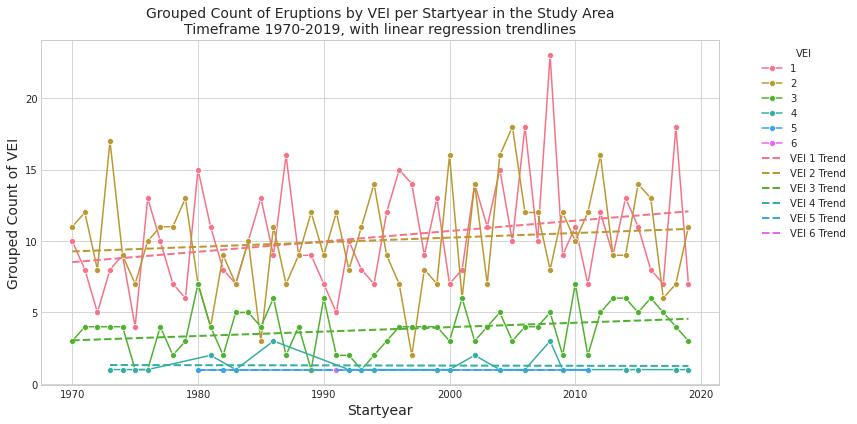

In [22]:
# set the style to a more scientific look
plt.style.use('seaborn-whitegrid')

# initialize the plot
plt.figure(figsize=(12, 6))

# draw lineplot to connect points with solid lines
sns.lineplot(
    data=grouped_data,
    x='StartDateYear',
    y='Count',
    hue='ExplosivityIndexMax',
    marker='o',
    dashes=False,
    palette=sns.color_palette("husl"),
    legend="full"
)

# add linear regression lines for each ExplosivityIndexMax group
unique_vei = grouped_data['ExplosivityIndexMax'].unique()
palette = sns.color_palette("husl", len(unique_vei))

for i, vei in enumerate(unique_vei):
    # Filter data for the current VEI
    vei_data = grouped_data[grouped_data['ExplosivityIndexMax'] == vei]
    x = vei_data['StartDateYear']
    y = vei_data['Count']

    # Fit linear regression
    coeffs = np.polyfit(x, y, 1)
    trendline = np.polyval(coeffs, x)

    # Plot the regression line
    plt.plot(x, trendline, color=palette[i], linestyle='--', linewidth=2, label=f"VEI {vei} Trend")

# customize labels and legend
plt.title('Grouped Count of Eruptions by VEI per Startyear in the Study Area\nTimeframe 1970-2019, with linear regression trendlines', fontsize=14)
plt.xlabel('Startyear', fontsize=14)
plt.ylabel('Grouped Count of VEI', fontsize=14)
plt.legend(title='VEI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# save diagram to disk
plt.savefig(os.path.join(data_dir_cluster, "41_Grouped_Count_of_Eruptions_by_VEI_per_Startyear_in_the_Study_Area.png"), format='png', dpi=150, bbox_inches='tight')
logging.info(f"{script_name}: Saving 41_Grouped_Count_of_Eruptions_by_VEI_per_Startyear_in_the_Study_Area.png to './{data_dir_cluster}'.")

# show the plot
plt.show()

### Correlation matrix

2025-01-30 18:09:43,440 - INFO - 41_eda_volcanic_eruptions.ipynb: Saving 41_Correlation_Matrix_of_Volcanic_Features_from_the_Study_Area.png to './data/scope/studyarea_1000/cluster_all'.


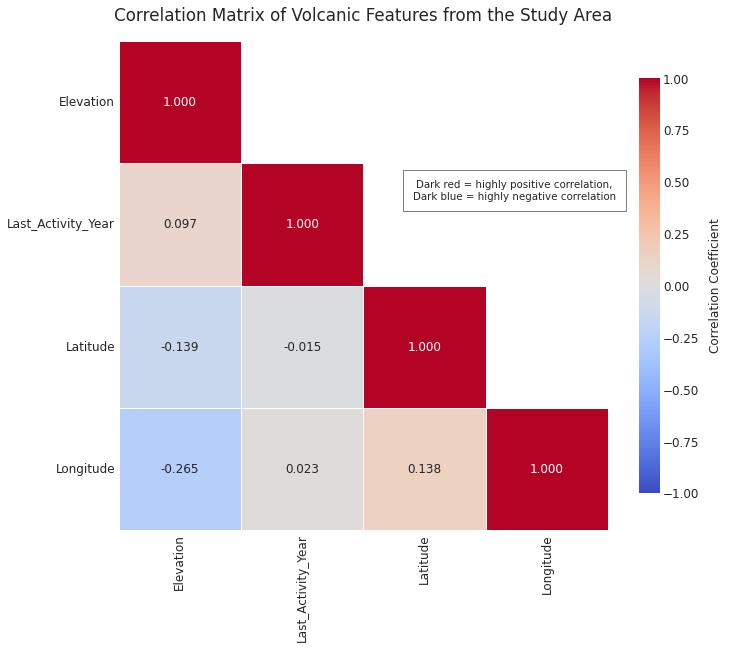

In [23]:
# set selected features for correlation
num_col_volcanoes_corr = ['Last_Activity_Year',
                          'Latitude',
                          'Longitude',
                          'Elevation']

# build a correlation matrix
corr = volcanoes_enriched[sorted(num_col_volcanoes_corr)].corr()

# set parameters for figure
basic_fontsize = 12

# set up the figure
plt.figure(figsize=(10, 8))

# create a mask for hiding the strict upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# heatmap
heatmap = sns.heatmap(corr, 
                      mask=mask,
                      vmin=-1, vmax=1, 
                      annot=True, 
                      cmap='coolwarm',
                      cbar_kws={"shrink": .8},
                      linewidths=0.5,
                      fmt=".3f",
                      square=True,
                      annot_kws={"size": basic_fontsize})

# improve the appearance
plt.title('Correlation Matrix of Volcanic Features from the Study Area', 
          fontsize=basic_fontsize*1.4, pad=20)
plt.tight_layout()

# disable gridding
plt.grid(False)

# rotate tick labels
plt.yticks(rotation=0, fontsize=basic_fontsize)
plt.xticks(rotation=90, ha='center', fontsize=basic_fontsize)

# add a colorbar with label
cbar = heatmap.collections[0].colorbar
cbar.set_label("Correlation Coefficient", labelpad=10, fontsize=basic_fontsize)

# customize the color bar
cbar.ax.tick_params(labelsize=basic_fontsize)
cbar.outline.set_linewidth(0)

# adjust layout to prevent clipping
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.95)

# add  explanations
plt.figtext(0.65, 0.65, 
            "Dark red = highly positive correlation,\n" 
            "Dark blue = highly negative correlation",
            ha="center", fontsize=basic_fontsize*0.85, bbox={"facecolor":"white", "alpha":0.5, "pad":10})

# save diagram to disk
plt.savefig(os.path.join(data_dir_cluster, "41_Correlation_Matrix_of_Volcanic_Features_from_the_Study_Area.png"), format='png', dpi=150, bbox_inches='tight')
logging.info(f"{script_name}: Saving 41_Correlation_Matrix_of_Volcanic_Features_from_the_Study_Area.png to './{data_dir_cluster}'.")

# show figure
plt.show()

2025-01-30 18:09:44,069 - INFO - 41_eda_volcanic_eruptions.ipynb: Saving 41_Correlation_Matrix_of_Volcanic_Eruption_Features_from_the_Study_Area.png to './data/scope/studyarea_1000/cluster_all'.


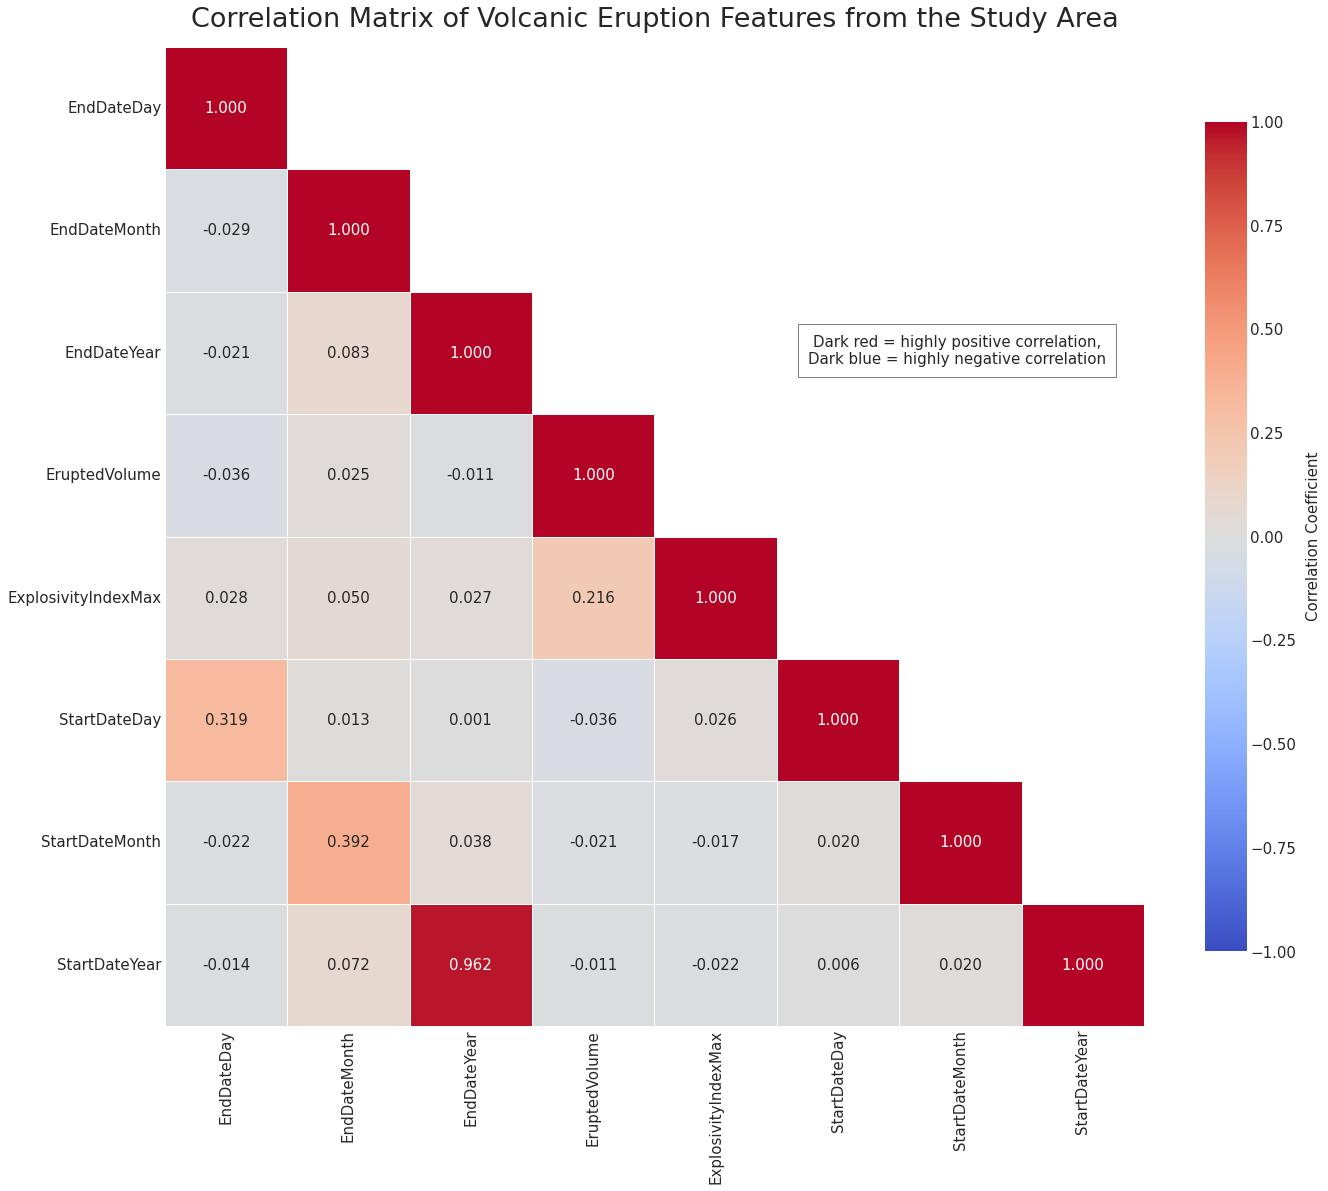

In [24]:
# set selected features for correlation
num_col_eruptions_corr = ['StartDateYear',
                          'EndDateYear',
                          'StartDateMonth',
                          'EndDateMonth',
                          'StartDateDay',
                          'EndDateDay',
                          'ExplosivityIndexMax',
                          'EruptedVolume'
                         ]

# build a correlation matrix
corr = eruptions_enriched[sorted(num_col_eruptions_corr)].corr()

# set parameters for figure
basic_fontsize = 15

# set up the figure
plt.figure(figsize=(20, 16))

# create a mask for hiding the strict upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# heatmap
heatmap = sns.heatmap(corr, 
                      mask=mask,
                      vmin=-1, vmax=1, 
                      annot=True, 
                      cmap='coolwarm',
                      cbar_kws={"shrink": .8},
                      linewidths=0.5,
                      fmt=".3f",
                      square=True,
                      annot_kws={"size": basic_fontsize})

# improve the appearance
plt.title('Correlation Matrix of Volcanic Eruption Features from the Study Area', 
          fontsize=basic_fontsize*1.8, pad=20)
plt.tight_layout()

# disable gridding
plt.grid(False)

# rotate tick labels
plt.yticks(rotation=0, fontsize=basic_fontsize)
plt.xticks(rotation=90, ha='center', fontsize=basic_fontsize)

# add a colorbar with label
cbar = heatmap.collections[0].colorbar
cbar.set_label("Correlation Coefficient", labelpad=10, fontsize=basic_fontsize)

# customize the color bar
cbar.ax.tick_params(labelsize=basic_fontsize)
cbar.outline.set_linewidth(0)

# adjust layout to prevent clipping
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.95)

# add  explanations
plt.figtext(0.65, 0.65, 
            "Dark red = highly positive correlation,\n" 
            "Dark blue = highly negative correlation",
            ha="center", fontsize=basic_fontsize, bbox={"facecolor":"white", "alpha":0.5, "pad":10})

# save diagram to disk
plt.savefig(os.path.join(data_dir_cluster, "41_Correlation_Matrix_of_Volcanic_Eruption_Features_from_the_Study_Area.png"), format='png', dpi=150, bbox_inches='tight')
logging.info(f"{script_name}: Saving 41_Correlation_Matrix_of_Volcanic_Eruption_Features_from_the_Study_Area.png to './{data_dir_cluster}'.")

# show figure
plt.show()

## End of script

In [25]:
# log the end of this script
logging.info(f"End of script '{script_name}'.")

2025-01-30 18:09:44,234 - INFO - End of script '41_eda_volcanic_eruptions.ipynb'.


## Appendix

In [26]:
%%js

// -------------------------------------------
// What are the headings of this document?
// --> Get a better overview of the structure.
// -------------------------------------------

function listHeadings() {
    let headings = [];
    let cells = Jupyter.notebook.get_cells();
    
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text();
            let lines = text.split('\n');
            
            lines.forEach((line) => {
                let match = line.match(/^(#+)\s+(.*)/);
                if (match) {
                    headings.push({
                        level: match[1].length, // Number of # symbols indicates the heading level
                        text: match[2].trim()
                    });
                }
            });
        }
    });
    return headings;
}

let headings = listHeadings();
headings.forEach((heading) => {
    let markdown = `${'#'.repeat(heading.level)} ${heading.text}`;
    element.append(`${markdown}<br>`);
});

<IPython.core.display.Javascript object>

# -------------------------------------------------------------------------------------------------

### Change of cumulative activity of subaerial volcanoes
Investigating the cumulative activity of subaerial volcanoes from 1920-2019 in the form of CDE grouped by decade provides a more detailed temporal analysis of volcanic eruptions over the last 10 decades. The data was visualized using a combination of a heatmap and boxplots, depicting the CDE on a yearly basis and providing a statistical analysis for each decade. This also allows an implicit analysis of the number of concurrent eruptions and their duration.

To provide this analysis, calculating the date ranges of eruptions and counting the daily eruptions is necessary. Finally, these are summed up per year and decade and plotted as a temporal heatmap, with boxplots included for statistical information.

The figure and table illustrate trends in volcanic activity over time, highlighting increased activity over time. Three activity clusters are identifiable: (1) 1920-1959 with a mean CDE of 4,000-8,000, (2) 1960-1999 with a mean CDE of 8,000-12,000, and (3) 2000-2019 with a mean CDE of 12,000-16,000. These three clusters are also visible from the CDE totals per decade, which collectively account for 967,323 days of eruptions.

In [27]:
# # create a date range from the earliest start date to the latest end date
# # attn: this calculations take up to c. 20 sec to trun
# date_range = pd.date_range(eruptions_selected['StartDate'].min(), eruptions_selected['EndDate'].max())

# # create a DataFrame to hold the count of active eruptions per day
# active_eruptions = pd.DataFrame(date_range, columns=['date'])
# active_eruptions['active_count'] = 0

# # count active eruptions for each day
# for index, row in active_eruptions.iterrows():
#     active_eruptions.loc[index, 'active_count'] = ((eruptions_selected['StartDate'] <= row['date']) & (eruptions_selected['EndDate'] >= row['date'])).sum()

# # group by year and calculate cumulative sum
# active_eruptions['year'] = active_eruptions['date'].dt.year
# yearly_cumulative = active_eruptions.groupby('year').agg({
#     'active_count': ['mean', 'sum']
# })

# # flatten column names
# yearly_cumulative.columns = ['avg_active_count', 'cumulative_active_count']

# # reset index to make 'year' a column
# yearly_cumulative = yearly_cumulative.reset_index()

# # filter for years between 1920-2019
# yearly_cumulative = yearly_cumulative[(yearly_cumulative['year'] >= 1920) & (yearly_cumulative['year'] <= 2019)]

In [28]:
# # pivot by Region and create a pivot table
# eruptions_selected_region_pivot = pd.pivot_table(yearly_cumulative, index='decade', aggfunc='sum')

# # make a dataframe
# eruptions_selected_region_pivot = pd.DataFrame(eruptions_selected_region_pivot) 

# # update the index names to display titles
# eruptions_selected_region_pivot.index.name = 'Decade'

# # drop unwanted features
# eruptions_selected_region_pivot.drop(columns=['avg_active_count', 'year', 'year_in_decade'], inplace=True)

# # rename the column
# eruptions_selected_region_pivot = eruptions_selected_region_pivot.rename(columns={'cumulative_active_count': 'Count'})

# # sorting by counts
# eruptions_selected_region_pivot = eruptions_selected_region_pivot.sort_values(by='Decade', ascending=True)

# # add sums for rows (Total)
# eruptions_selected_region_pivot.loc['Total'] = eruptions_selected_region_pivot.sum()

# # display the result
# display(eruptions_selected_region_pivot)

In [29]:
# # prepare the data for the combined heatmap and boxplots figure
# yearly_cumulative['decade'] = (yearly_cumulative['year'] // 10) * 10
# yearly_cumulative['year_in_decade'] = yearly_cumulative['year'] % 10

# # pivot the table to have decades as rows and years within decades as columns for heatmap
# heatmap_data = yearly_cumulative.pivot(index='decade', columns='year_in_decade', values='cumulative_active_count')

# # calculate mean values for each decade
# decade_means = yearly_cumulative.groupby('decade')['cumulative_active_count'].mean()

In [30]:
# # create a figure with 4 subplots
# fig = plt.figure(figsize=(18, 8))
# gs = gridspec.GridSpec(1, 4, width_ratios=[0.96, 0.02, 0.96, 0.02])

# # create an axes for the colorbar for all figures together
# cax = plt.subplot(gs[3])

# # heatmap subplot
# ax0 = plt.subplot(gs[0])
# heatmap = sns.heatmap(heatmap_data, 
#             annot=True, 
#             fmt='.0f', 
#             cmap='YlOrRd', 
#             cbar_kws={'label': 'Cumulative Days of Eruption (CDE)'},
#             cbar_ax=cax,
#             ax=ax0
#            )
# ax0.set_xlabel('Year in Decade', fontsize=14)
# ax0.set_ylabel('Decade', fontsize=14)
# ax0.tick_params(axis='both', which='major', labelsize=11)
# ax0.grid(False)

# # get color normalization from the heatmap
# norm = heatmap.collections[0].norm

# # set the colorbar font sizes
# cax.yaxis.label.set_size(14)
# cax.tick_params(labelsize=11)

# # boxplot subplot
# ax1 = plt.subplot(gs[2])

# # prepare data for boxplot
# decades = sorted(yearly_cumulative['decade'].unique())
# box_data = [yearly_cumulative[yearly_cumulative['decade'] == d]['cumulative_active_count'] for d in decades]

# # create boxplot
# bp = ax1.boxplot(box_data, 
#                  vert=False, 
#                  patch_artist=True, 
#                  medianprops=dict(color="black", linewidth=1.5),
#                  whiskerprops=dict(color="black", linewidth=1.5),
#                  capprops=dict(color="black", linewidth=1.5))

# # color each box based on the decade mean
# for box, decade in zip(bp['boxes'], decades):
#     box_color = plt.cm.YlOrRd(norm(decade_means[decade]))
#     box.set(facecolor=box_color, edgecolor='black', linewidth=1.5)

# # set various params for the boxplots
# ax1.set_xlabel('Cumulative Days of Eruption (CDE)', fontsize=14)
# ax1.set_ylabel('', fontsize=14)
# ax1.set_yticklabels([])
# ax1.tick_params(axis='both', which='major', labelsize=11)
# ax1.spines['left'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)

# # invert y-axis to match heatmap order
# ax1.invert_yaxis()

# # title (for both figures)
# plt.suptitle('Yearly Cumulative Days of Eruption (CDE) for 1920-2019 Grouped by Decades\nCombined Heatmap with Boxplots for Basic Statistical Analysis', fontsize=18)

# # adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.98])

# # display plot
# plt.show()

### Worldwide spatio-temporal patterns of subaerial volcanoes
The study of spatio-temporal patterns of worldwide subaerial volcanic activity from 1920 to 2019 reveals distinct changes in spatial volcanic behavior. Using the combined dataset, the CAE was calculated, with the VEI implicitly informing these measurements. The data was grouped by decade and spatial clusters, creating a series of global heatmaps visualizing CAE distribution. Faceting these heatmaps by decade highlights temporal and regional variations in both the magnitude and frequency of volcanic eruptions.
<br><br>
The analysis process involved merging both dataframes, adding a decade, and grouping the erupted volume by decade. The previously generated data was converted to a flat table, and a figure was created which was also converted to a geopandas dataframe with spatial information (locations).

In [31]:
# # merging both dataframes (emphasising eruptions)
# eruptions_combined_selected = pd.merge(eruptions_selected, volcanoes_selected, how='inner', on='Volcano_Number')

# # add decade information
# eruptions_combined_selected['decade'] = (eruptions_combined_selected['StartDateYear'] // 10) * 10

In [32]:
# # group by Volcano_Number and decade and sum up the EruptedVolume (per volcano per decade)
# volume_per_volcano_decade = eruptions_combined_selected.groupby(['Volcano_Number', 'decade'])['EruptedVolume'].sum().reset_index(name='total_EruptedVolume')

# # pivot the dataframe to have volcanoes as rows and decades as columns
# pivot_table_volume = volume_per_volcano_decade.pivot(index='Volcano_Number', columns='decade', values='total_EruptedVolume').fillna(0)

# # add sums for rows and columns
# pivot_table_volume['Total'] = pivot_table_volume.sum(axis=1)
# pivot_table_volume.loc['Total'] = pivot_table_volume.sum()

# # update the column and index names to display titles as "Area" and "Year"
# pivot_table_volume.index.name = 'Volcano_Number'
# pivot_table_volume.columns.name = 'Decade'

# # display(energy_per_area_year)
# display(pivot_table_volume)

In [33]:
# # create a flat table from the pivot table
# flat_df = pivot_table_volume.reset_index()

# # drop row and column sums
# flat_df = flat_df.drop(columns=['Total'])
# flat_df = flat_df[flat_df['Volcano_Number'] != 'Totals']

# # covert to long table format
# long_flat_df = flat_df.melt(id_vars=['Volcano_Number'], var_name='Decade', value_name='EruptedVolume_total')

# # merge information to eventually combine everything to get a gdf for plotting
# long_flat_df_combined = pd.merge(long_flat_df, eruptions_combined_selected[['Volcano_Number', 'geometry']], on='Volcano_Number')

# # no need to have entries with 0 erupted volumne
# long_flat_df_combined = long_flat_df_combined.loc[long_flat_df_combined['EruptedVolume_total'] != 0]

In [34]:
# # convert the DataFrame to a GeoDataFrame in Mercator Projection (EPSG:3857) or WGS84 (EPSG:4326)
# long_flat_df_combined_gdf = gpd.GeoDataFrame(long_flat_df_combined, geometry='geometry', crs="EPSG:4326")

In [35]:
# # preparing decade information
# decades = sorted(long_flat_df_combined_gdf['Decade'].unique())
# decades = [decade for decade in decades if decade >= 1920]

# # preparing plot and subplots
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
# axes = axes.flatten() 

# # create a list to store all hexbin objects
# hexbins = []

# # iterate through all decades
# for i, decade in enumerate(decades):
    
#     # use axes
#     ax = axes[i]
    
#     # add title
#     ax.set_title(f"{decade} - {decade+9}", fontsize=20)
    
#     # create a decade based gdf
#     decade_gdf = long_flat_df_combined_gdf[long_flat_df_combined_gdf['Decade'] == decade]
    
#     # Plot a basic map of the world
#     world.plot(
#         ax=ax,
#         color="#dddddd",
#         edgecolor=None,
#         alpha=0.5
#     )
    
#     # plot a hexbin map of erupted volume   
#     hexbin = ax.hexbin(decade_gdf.geometry.x,
#                        decade_gdf.geometry.y,
#                        C=np.log10(decade_gdf['EruptedVolume_total']),
#                        gridsize=20,
#                        cmap='YlOrRd',
#                        edgecolor='darkgray',
#                        mincnt=1,
#                        alpha=1.0
#                       )
#     hexbins.append(hexbin)
    
#     # add axis labels
#     ax.set_xlabel('Longitude', fontsize=16)
#     ax.set_ylabel('Latitude', fontsize=16)
#     # Set the x-axis limits to clip the figure
#     ax.set_xlim(-180, 180)
#     ax.set_ylim(-90, 90)
    
#     # adjust ticks
#     ax.tick_params(axis='both', which='major', labelsize=14)
    
#     # add grids
#     ax.minorticks_on()
#     ax.grid(which="major", visible=True, alpha=0.50, color="#999999")
#     ax.grid(which="minor", visible=True, alpha=0.25, color="#cccccc")
    
# # adjust the layout to make room for the colorbar
# plt.tight_layout()
# fig.subplots_adjust(right=0.9, top=0.95)

# # add a single colorbar for all subplots (various commands)
# cbar_ax = fig.add_axes([0.92, 0.35, 0.018, 0.3])
# norm = plt.Normalize(vmin=3, vmax=10)
# sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
# sm.set_array([])
# cbar = fig.colorbar(sm, cax=cbar_ax)
# cbar.set_label('log10(Total Erupted Volume)', fontsize=16)
# cbar.ax.tick_params(labelsize=14)
# cbar.set_ticks(range(3, 11))

# # add one main title for the entire figure
# fig.suptitle('Total Erupted Volcanic Volume by Decade', fontsize=24, fontweight='bold')

# # show the plot
# plt.show()

## Save notebook as experimentation protocol

In [47]:
# save notebook as a experimentation protocol
time.sleep(2)
display(Javascript('IPython.notebook.save_checkpoint();'))
time.sleep(2)
save_notebook_as_html(script_name, data_dir_cluster)

<IPython.core.display.Javascript object>

Notebook saved as HTML: data/scope/studyarea_1000/cluster_all/41_eda_volcanic_eruptions.html
